In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv

#### Reading data for analysis. 

In [22]:
df = pd.read_csv('data.csv', sep=';')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      316 non-null    object
 1   sex         316 non-null    object
 2   age         316 non-null    int64 
 3   address     316 non-null    object
 4   famsize     316 non-null    object
 5   Pstatus     316 non-null    object
 6   Medu        316 non-null    int64 
 7   Fedu        316 non-null    int64 
 8   Mjob        316 non-null    object
 9   Fjob        316 non-null    object
 10  reason      316 non-null    object
 11  guardian    316 non-null    object
 12  traveltime  316 non-null    int64 
 13  studytime   316 non-null    int64 
 14  failures    316 non-null    int64 
 15  schoolsup   316 non-null    object
 16  famsup      316 non-null    object
 17  paid        316 non-null    object
 18  activities  316 non-null    object
 19  nursery     316 non-null    object
 20  higher    

There are no null values which is a good thing for building a model.


In [23]:
#features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
##print the feature name and the percentage of missing values
#print(features_with_na)
#for feature in features_with_na:
    #print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

#### Getting to know the data

In [24]:
pd.set_option('display.max_columns',None)
df.drop_duplicates
display(df.shape)
display(df.head())
df.describe()


(316, 33)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,16,U,LE3,T,4,3,teacher,services,course,mother,3,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,3,1,2,1,2,16,15,15
1,GP,M,18,U,LE3,T,1,1,other,other,course,mother,1,1,3,no,no,no,no,yes,no,yes,yes,2,3,5,2,5,4,0,6,5,0
2,GP,M,17,R,LE3,A,4,4,teacher,other,course,mother,2,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,2,3,4,2,10,11,12
3,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,4,4,1,1,5,10,7,6,6
4,GP,M,16,U,GT3,T,2,3,other,other,home,father,2,1,0,no,no,no,no,yes,yes,yes,no,5,3,3,1,1,3,0,13,14,14


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,16.693038,2.768987,2.525316,1.436709,2.088608,0.306962,3.924051,3.240506,3.151899,1.474684,2.297468,3.503165,5.693038,10.924051,10.753165,10.417722
std,1.310791,1.104301,1.070228,0.703132,0.849872,0.724239,0.908823,0.968916,1.099363,0.899378,1.311776,1.404072,7.580096,3.198302,3.677796,4.580449
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000,19.000000,19.000000,20.000000


In [25]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  16


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,16,4,3,3,2,0,5,4,3,1,2,1,2,16,15,15
1,18,1,1,1,1,3,2,3,5,2,5,4,0,6,5,0
2,17,4,4,2,2,0,3,3,3,2,3,4,2,10,11,12
3,15,3,2,1,2,0,4,4,4,1,1,5,10,7,6,6
4,16,2,3,2,1,0,5,3,3,1,1,3,0,13,14,14


In [26]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
for feature in discrete_feature:
    print('"{}" ________ {}__{}'.format(feature,min(df[feature]),max(df[feature])))

Discrete Variables Count: 15
"age" ________ 15__22
"Medu" ________ 0__4
"Fedu" ________ 0__4
"traveltime" ________ 1__4
"studytime" ________ 1__4
"failures" ________ 0__3
"famrel" ________ 1__5
"freetime" ________ 1__5
"goout" ________ 1__5
"Dalc" ________ 1__5
"Walc" ________ 1__5
"health" ________ 1__5
"G1" ________ 5__19
"G2" ________ 0__19
"G3" ________ 0__20


In [27]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features))
for feature in categorical_features:
    print('"{}" ________ {}'.format(feature,len(df[feature].unique())))

Number of categorical variables:  17
"school" ________ 2
"sex" ________ 2
"address" ________ 2
"famsize" ________ 2
"Pstatus" ________ 2
"Mjob" ________ 5
"Fjob" ________ 5
"reason" ________ 4
"guardian" ________ 3
"schoolsup" ________ 2
"famsup" ________ 2
"paid" ________ 2
"activities" ________ 2
"nursery" ________ 2
"higher" ________ 2
"internet" ________ 2
"romantic" ________ 2


#### Settings for visuals

In [28]:
plt.rcParams["font.family"] = "Luminari"
sns.set_theme(style='whitegrid', palette='magma')

#### Distribution of final grades

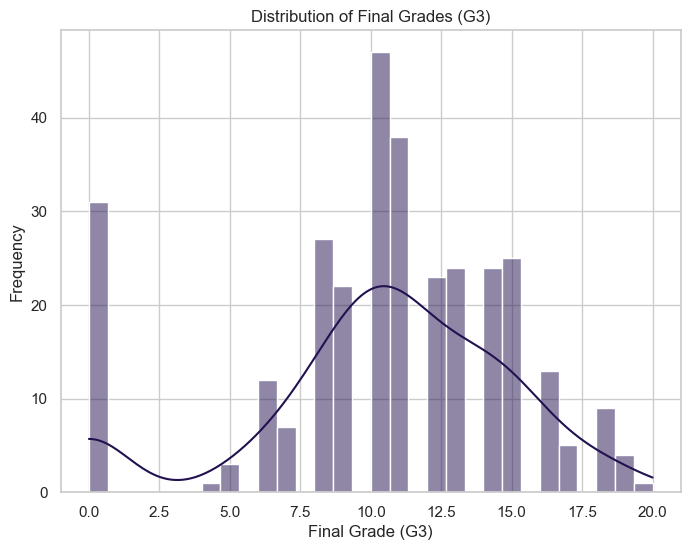

In [29]:
# Visualize the distribution of the target variable 'G3' (final grade)
plt.figure(figsize=(8, 6))
sns.histplot(df['G3'], bins=30, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()


The values in '0' may mean that the student did not attend the exam and was absent that day. It could be replaced with the mean of G1 and G2

In [30]:
df['grade_avg'] = (df['G1'] + df['G2'] + df['G3']) / 3

df['grade_avg_G12'] = (df['G1'] + df['G2']) / 2 

#### Average distribution of Grade 1 and Grade 2 

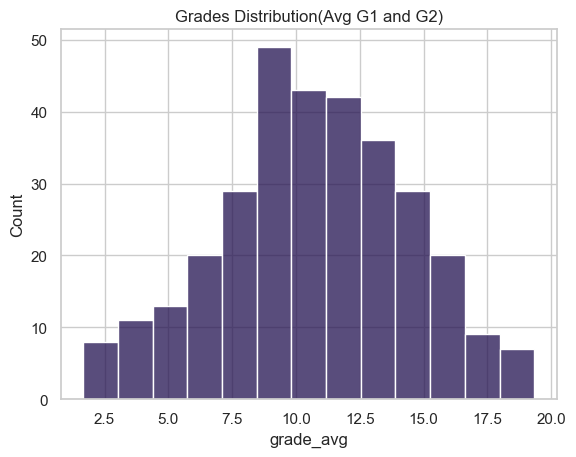

In [31]:
sns.histplot(df['grade_avg']);
plt.title('Grades Distribution(Avg G1 and G2)');
plt.savefig('Visualizations/gradesdistribution.png')
plt.show() 

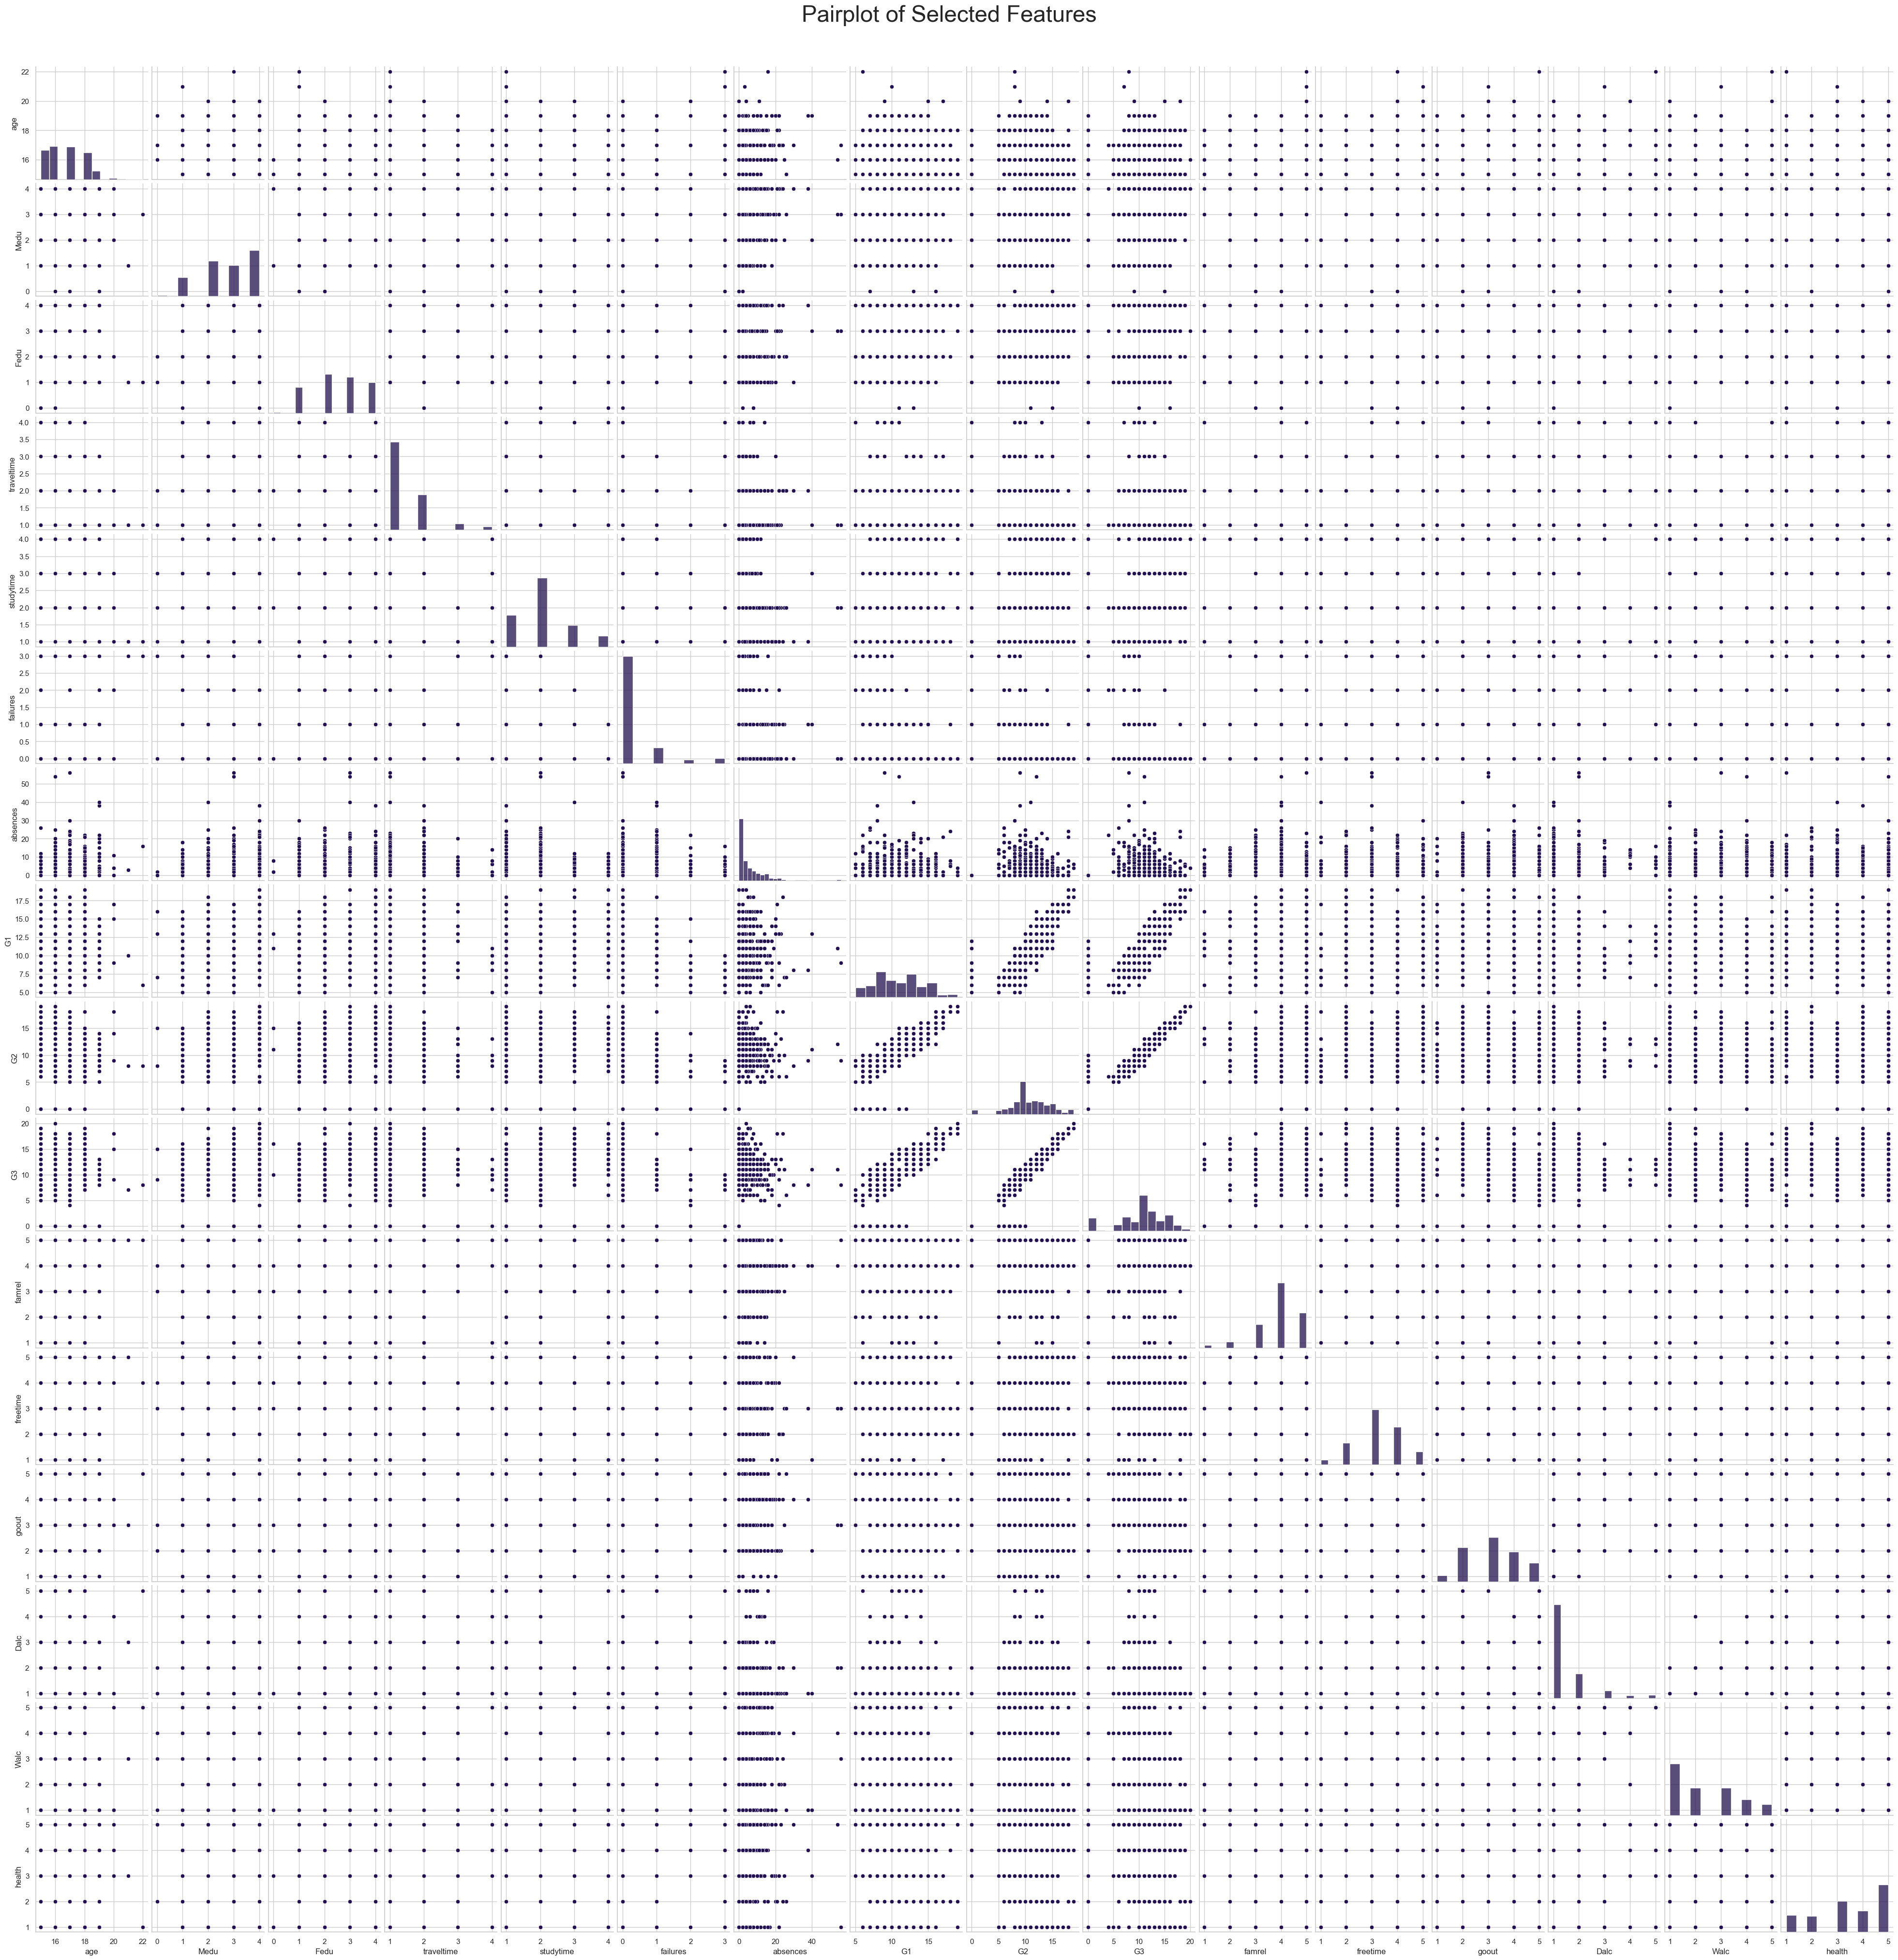

In [32]:
# Pairplot for visualizing relationships between features
sns.pairplot(df, vars=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3','famrel',
 'freetime','goout','Dalc','Walc','health'])
plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize =34)
plt.show()

#### Numerical features vs Target grade

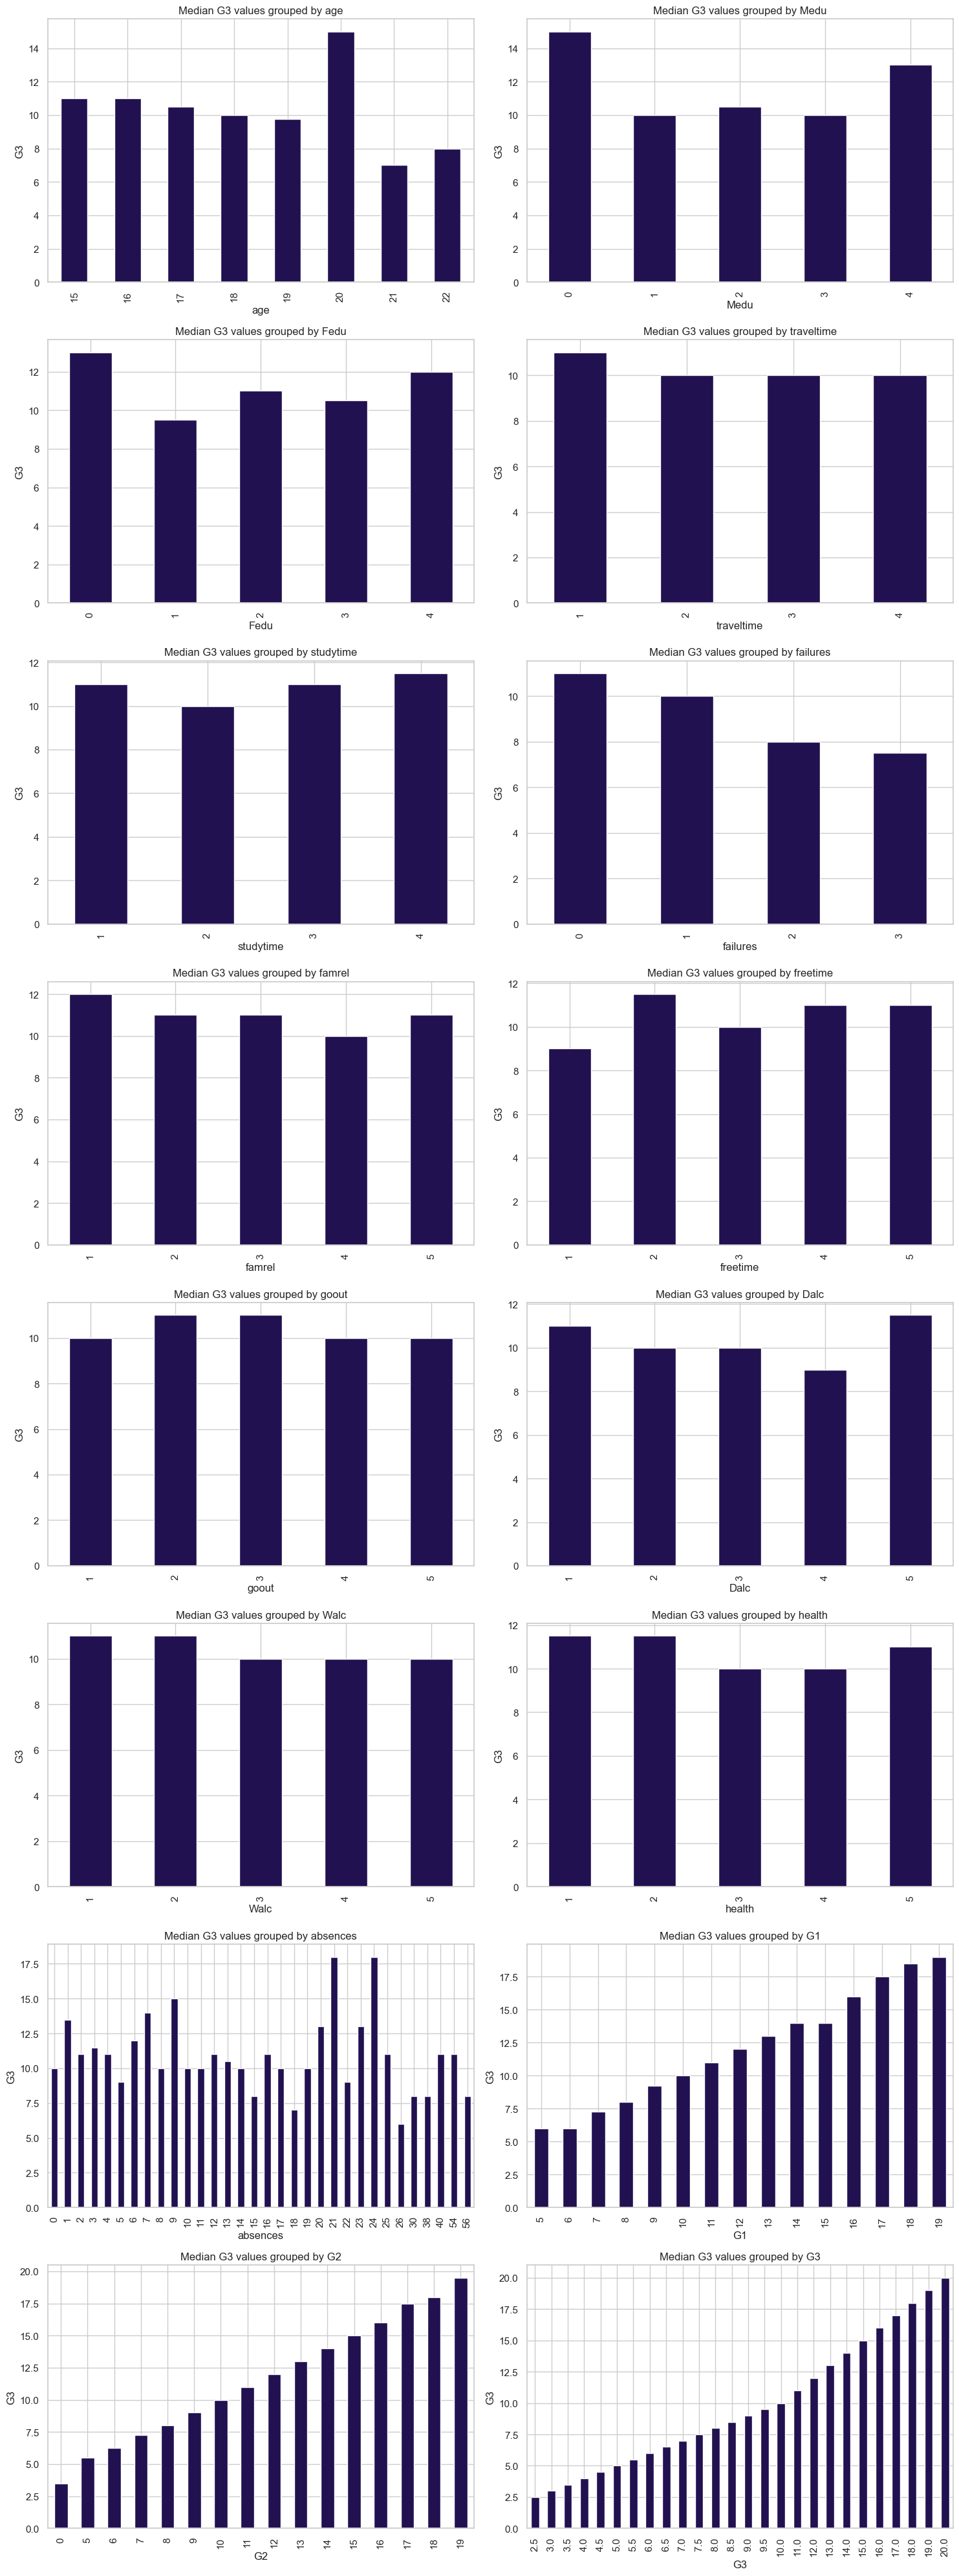

In [33]:

# Create subplots
fig, axes = plt.subplots(8, 2, figsize=(15, 40)) 
axes = axes.flatten()


for i, feature in enumerate(numerical_features):

    data = df.copy()
    
    mean_g1_g2 = data[['G1', 'G2']].mean(axis=1)
                                        
    # Update 'G3' values where 'G3' is 0 to the calculated mean
    data.loc[data['G3'] == 0, 'G3'] = mean_g1_g2[data['G3'] == 0]
  
    
    data.groupby(feature)['G3'].median().plot.bar(ax=axes[i]) 
   
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('G3')
    axes[i].set_title(f'Median G3 values grouped by {feature}')

plt.tight_layout()
plt.savefig('Visualizations/numfeaturevsG3.png')
plt.show()



There is a strong relation ship between  G1,G2,absence,failures vs G3

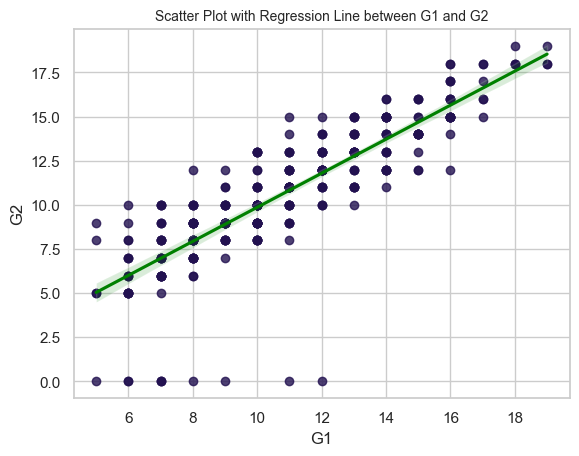

In [34]:
line_color = "green"
sns.regplot(x="G1", y="G2", data=data, line_kws={"color": line_color})
plt.title('Scatter Plot with Regression Line between G1 and G2', fontsize=10)
plt.savefig('Visualizations/scatg1g2.png')

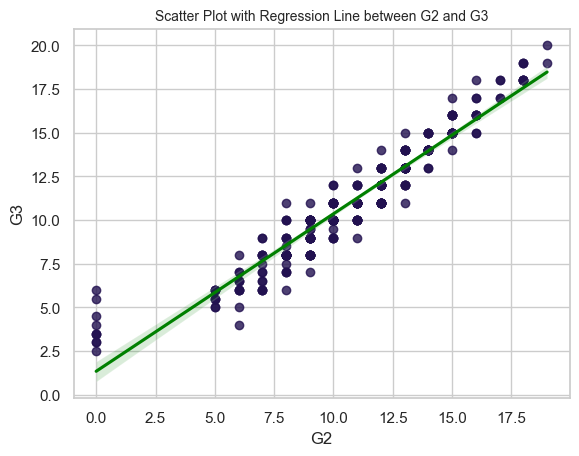

In [35]:
sns.regplot(x="G2", y="G3", data=data, line_kws={"color": line_color})
plt.title('Scatter Plot with Regression Line between G2 and G3', fontsize=10)
plt.savefig('Visualizations/scatg2G3.png')

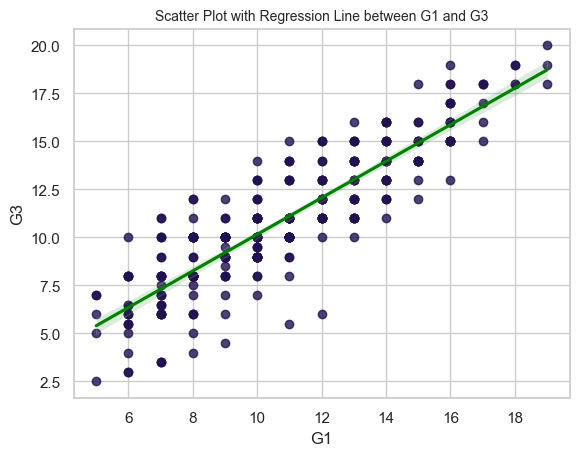

In [36]:
sns.regplot(x="G1", y="G3", data=data, line_kws={"color": line_color})
plt.title('Scatter Plot with Regression Line between G1 and G3', fontsize=10)
plt.savefig('Visualizations/scatg1g3G3.png')

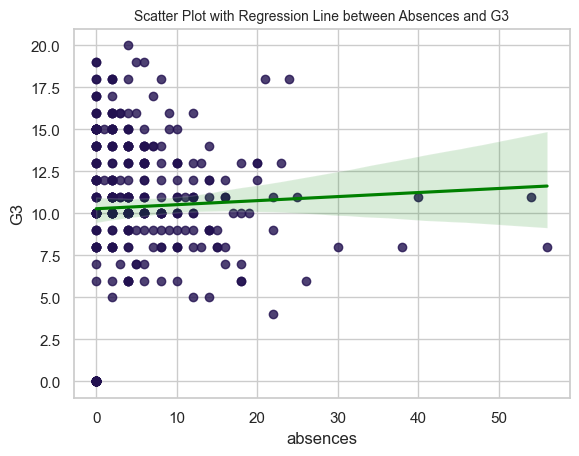

In [37]:

sns.regplot(x='absences', y='G3', data=df, line_kws={"color": line_color})
plt.title('Scatter Plot with Regression Line between Absences and G3', fontsize=10)
plt.savefig('Visualizations/scatabsenceg3.png')

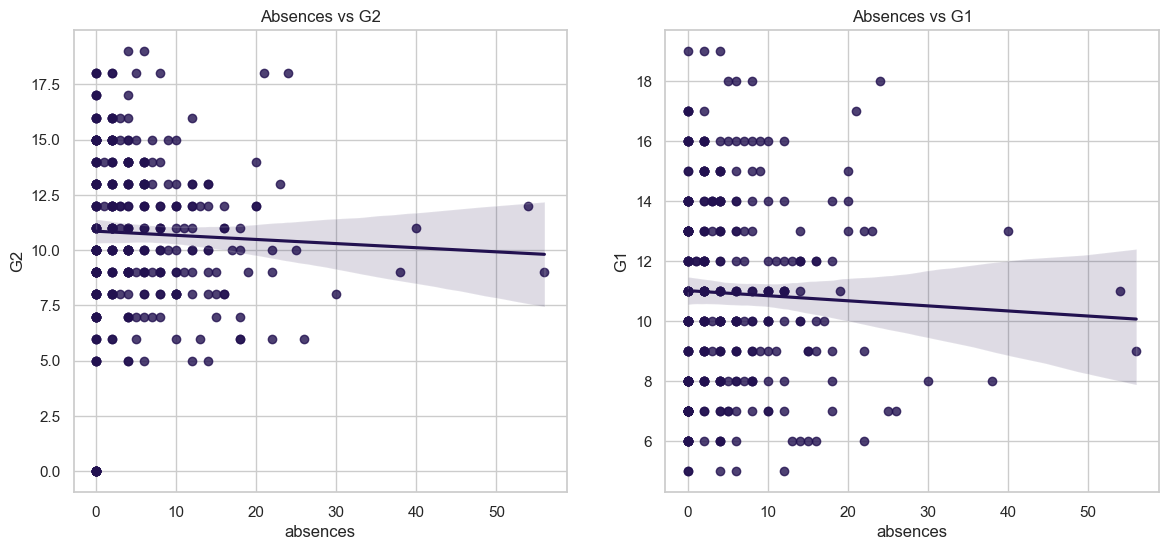

In [38]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.regplot(x='absences', y='G2', data=df, ax=axes[0])
axes[0].set(title='Absences vs G2')

sns.regplot(x='absences', y='G1', data=df, ax=axes[1])
axes[1].set(title='Absences vs G1')
plt.savefig('Visualizations/scatabsenceG3.png')


#### Categorical features vs Target grade

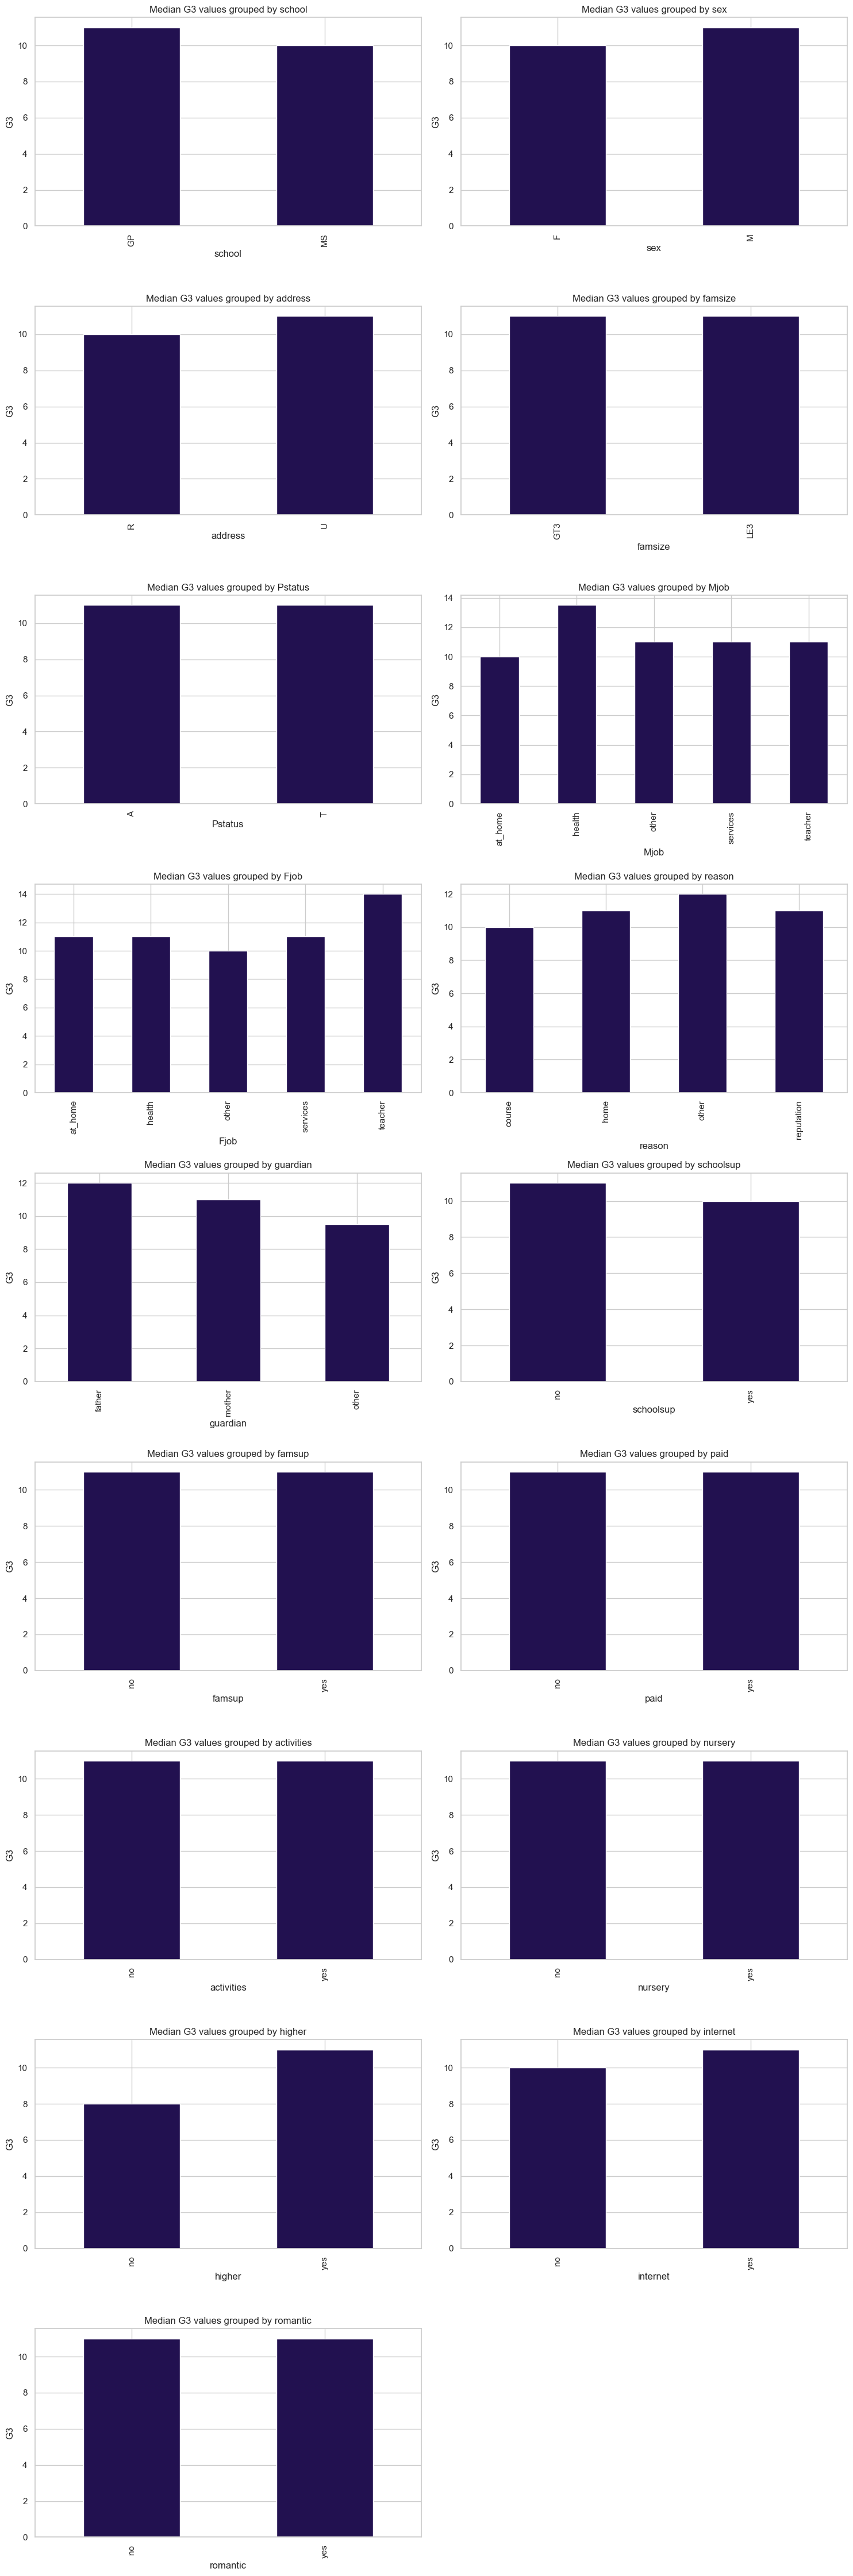

<Figure size 640x480 with 0 Axes>

In [39]:
# Iterate over categorical features for plotting
fig, axes = plt.subplots(9, 2, figsize=(15, 45))

axes = axes.flatten()

for i, feature in enumerate(categorical_features):

    data = df.copy()

    data.groupby(feature)['G3'].median().plot.bar(ax=axes[i])

    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('G3')
    axes[i].set_title(f'Median G3 values grouped by {feature}')

fig.delaxes(axes[17])
plt.tight_layout()
plt.show()
plt.savefig('Visualizations/categorical.png')

In [40]:
go_out = df.groupby("goout").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
go_out

,goout,G1,G2,G3
0,1,11.066667,10.733333,9.000000
1,2,11.308642,11.419753,11.111111
2,3,11.400000,11.190476,11.066667
3,4,10.549296,10.126761,9.746479
4,5,9.636364,9.500000,9.159091


Going out one or two days increases the score but 3 or more decreases the score.

In [41]:
X = df.copy()
y = X.pop("G3")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
print(X)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0         0    0   16        0        0        0     4     3     0     0   
1         0    1   18        0        0        0     1     1     1     1   
2         0    1   17        1        0        1     4     4     0     1   
3         0    0   15        0        0        0     3     2     2     1   
4         0    1   16        0        1        0     2     3     1     1   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...   
311       0    1   15        0        0        1     2     1     2     1   
312       0    0   17        0        1        1     4     4     1     2   
313       0    0   15        0        1        0     4     4     0     2   
314       1    0   19        1        1        0     2     3     2     1   
315       0    0   16        0        1        0     4     3     1     3   

     reason  guardian  traveltime  studytime  failures  schoolsup  famsup  \
0         

#### MI scores for all features

In [42]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

grade_avg        1.685830
G2               1.357136
grade_avg_G12    1.207737
G1               0.836158
absences         0.155020
failures         0.083623
Medu             0.074461
Mjob             0.053953
sex              0.049173
Walc             0.040372
Fjob             0.035535
health           0.032052
higher           0.025853
Dalc             0.024471
age              0.023201
romantic         0.017306
guardian         0.016203
school           0.014779
schoolsup        0.013445
goout            0.012305
activities       0.006104
address          0.004321
Pstatus          0.004242
internet         0.003272
nursery          0.001671
famsup           0.000000
famrel           0.000000
freetime         0.000000
studytime        0.000000
traveltime       0.000000
reason           0.000000
Fedu             0.000000
famsize          0.000000
paid             0.000000
Name: MI Scores, dtype: float64

#### MI scores -visual

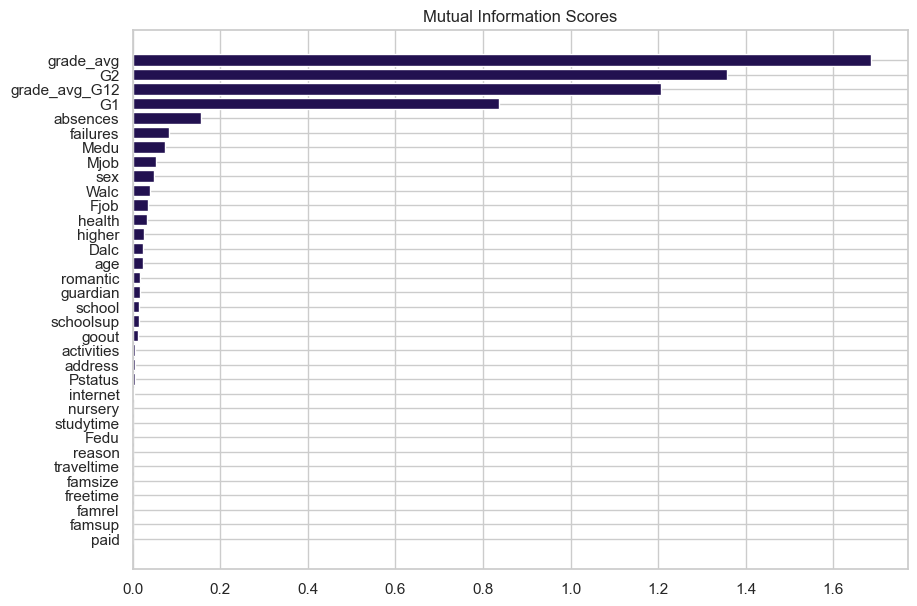

In [43]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(10, 7))
plot_mi_scores(mi_scores)
plt.savefig('Visualizations/MutualInformationScores.png')
plt.show()

G1 and G2 have a strong relationship with G3. But the absences and failures also indicate some relationship.

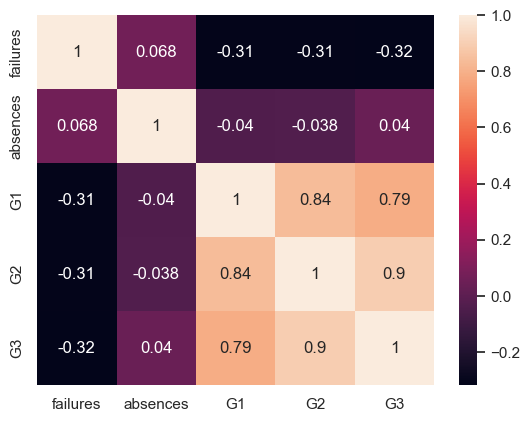

In [44]:
# Correlation matrix 
sns.heatmap(df[['failures','absences', 'G1', 'G2', 'G3']].corr(), annot=True)
plt.savefig('Visualizations/heatabsallgrades.png')